# Hands-on example of a neural network model for the automatic recognition of hand-written digits


<img src="Neural_network.png" alt="Drawing" style="width: 700px;"/>

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense
from keras.layers import Flatten

from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf

## Functions

In [39]:
# load train and test dataset
def load_MNIST_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

## Visualise data

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


<IPython.core.display.Javascript object>


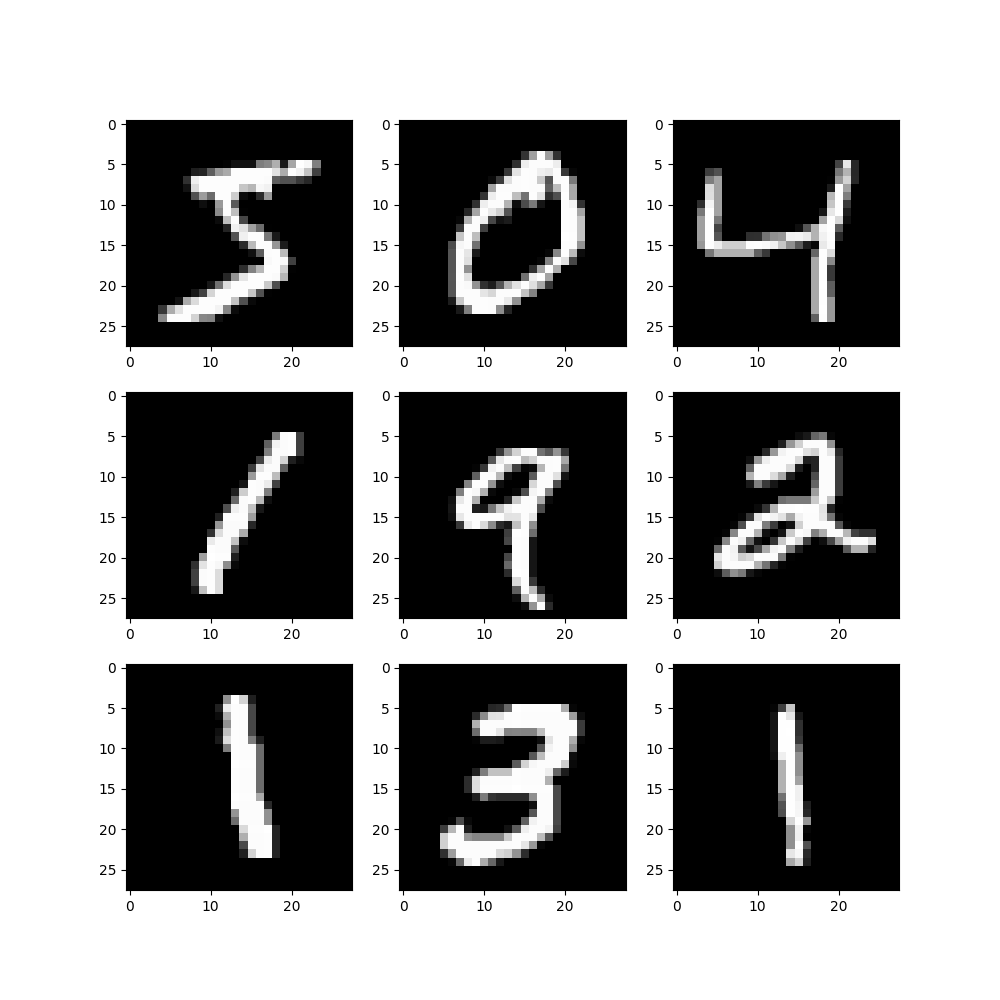

In [40]:
(trainX, trainY), (testX, testY) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
# plot first few images
fig = plt.figure(figsize=(10,10))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))


## Load MNIST dataset

In [41]:
print('load MNIST dataset (images X and labels Y)')
trainX, trainY, testX, testY = load_MNIST_dataset()

load MNIST dataset (images X and labels Y)


## Pre-processing
- Normalise
- Split train - test (but this is already done by the dataset for us)

### Normalise

In [42]:
print('normalise')
# convert from integers to floats
trainX = trainX.astype('float32')
testX = testX.astype('float32')
# normalize to range 0-1
trainX = trainX / 255.0
testX = testX / 255.0


normalise


## Develop ML model 

In [43]:
input_size = (28,28,1)
nb_classes = 10
x_inp = tf.keras.layers.Input(input_size) 
flat = tf.keras.layers.Flatten()(x_inp) # flattening
dense1 = tf.keras.layers.Dense(16, activation='relu')(flat) # hidden layer (16 nodes)
out = tf.keras.layers.Dense(10, activation='softmax')(flat) # output layer (10 nodes) + softmax

model = tf.keras.models.Model(inputs=x_inp, outputs=out)
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

## Test untrained model

In [44]:
print('test untrained model')
L = model.predict(testX)
y_pred = np.argmax(L,axis=1).reshape(-1,1)
y_test = np.argmax(testY,axis=1).reshape(-1,1)

test untrained model


<IPython.core.display.Javascript object>


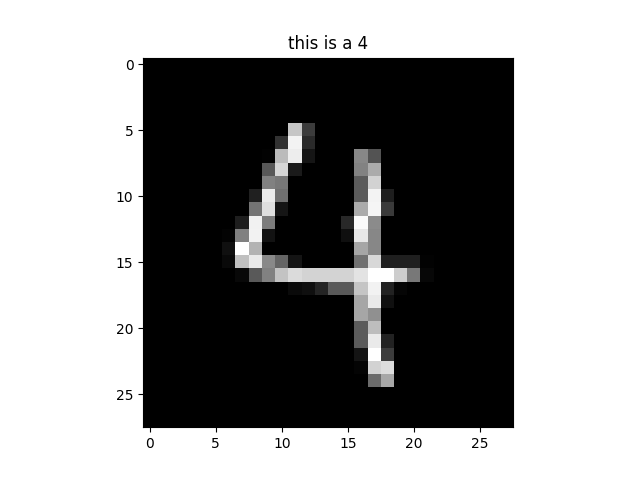

Text(0.5, 1.0, 'this is a 4')

In [45]:
k = 24

fig = plt.figure()
plt.imshow(testX[k,:,:,0], cmap=plt.get_cmap('gray'))
plt.title('this is a ' + str(y_pred[k,0]))

confusion matrix


<IPython.core.display.Javascript object>


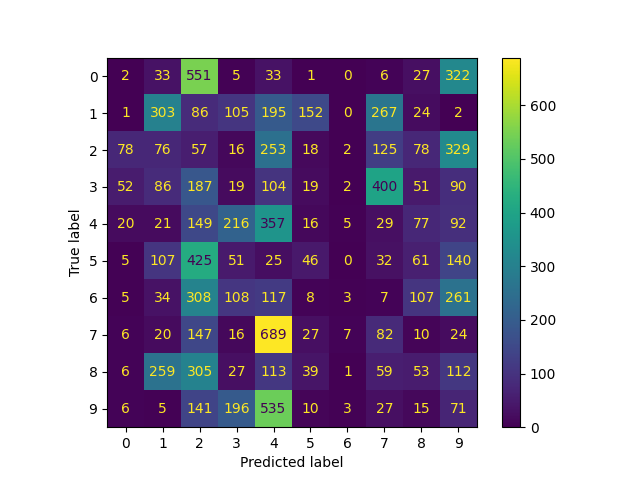

In [49]:
%matplotlib notebook
from sklearn.metrics import confusion_matrix
print('confusion matrix')
C = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(C).plot()

## Train model

In [47]:
print('train model')
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX, testY), verbose=1)

train model
Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4688 - accuracy: 0.8779 - val_loss: 0.3073 - val_accuracy: 0.9145
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3044 - accuracy: 0.9147 - val_loss: 0.2837 - val_accuracy: 0.9199
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9205 - val_loss: 0.2737 - val_accuracy: 0.9224
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9237 - val_loss: 0.2674 - val_accuracy: 0.9264
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9260 - val_loss: 0.2705 - val_accuracy: 0.9241
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2622 - accuracy: 0.9275 - val_loss: 0.2652 - val_accuracy: 0.9277
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2584 - accuracy: 0.9285 - val_loss: 0.2

<IPython.core.display.Javascript object>


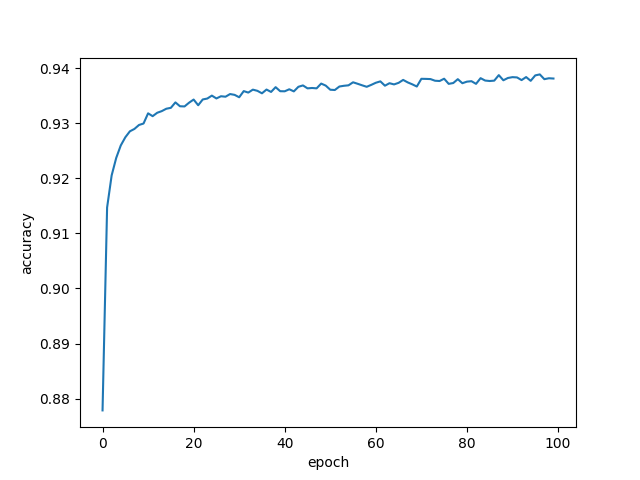

Text(0.5, 0, 'epoch')

In [50]:
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

## Test trained model

In [51]:
L = model.predict(testX)
y_pred = np.argmax(L,axis=1).reshape(-1,1)
y_test = np.argmax(testY,axis=1).reshape(-1,1)

In [52]:
_, acc = model.evaluate(testX, testY, verbose=0)
print('accuracy > %.3f' % (acc * 100.0))

accuracy > 92.530


<IPython.core.display.Javascript object>


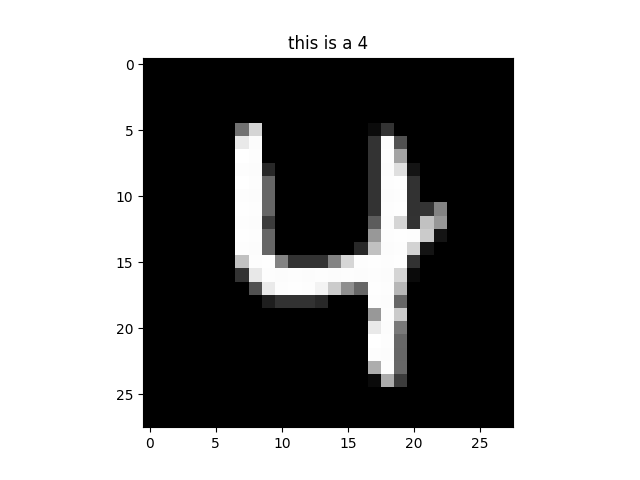

Text(0.5, 1.0, 'this is a 4')

In [54]:
k = 49
# 8,   33,   63,   66,  111,  149 (some of the wrong ones)

fig = plt.figure()
plt.imshow(testX[k,:,:,0], cmap=plt.get_cmap('gray'))
plt.title('this is a ' + str(y_pred[k,0]))

confusion matrix


<IPython.core.display.Javascript object>


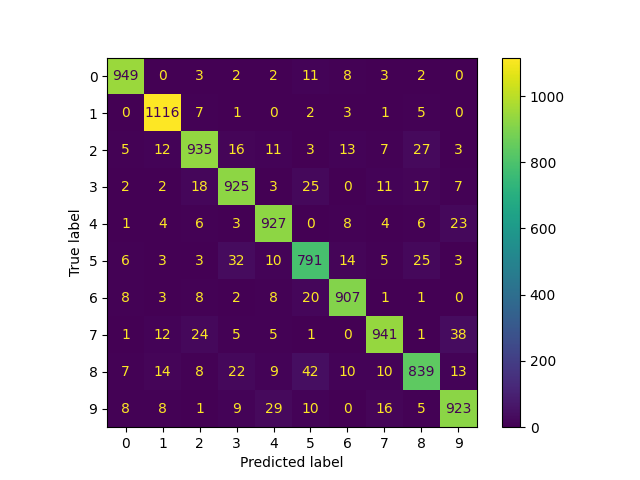

In [55]:
%matplotlib notebook
print('confusion matrix')
C = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(C).plot()

In [56]:
# get the mistakes
e = y_test-y_pred
np.where(e!=0)

(array([   8,   33,   63,   66,  111,  149,  193,  195,  217,  233,  241,
         247,  259,  290,  307,  313,  320,  321,  340,  344,  352,  362,
         381,  391,  403,  412,  425,  435,  444,  445,  448,  469,  478,
         479,  502,  507,  510,  516,  528,  536,  542,  543,  551,  565,
         569,  578,  582,  583,  591,  613,  627,  629,  659,  684,  691,
         692,  707,  714,  717,  720,  740,  760,  781,  786,  791,  829,
         839,  844,  857,  877,  881,  882,  896,  898,  938,  939,  947,
         950,  951,  956,  959,  965,  975,  999, 1003, 1012, 1014, 1028,
        1032, 1039, 1044, 1050, 1062, 1068, 1082, 1107, 1112, 1114, 1119,
        1128, 1145, 1152, 1156, 1178, 1181, 1182, 1191, 1192, 1194, 1198,
        1202, 1204, 1206, 1226, 1232, 1233, 1234, 1242, 1247, 1256, 1260,
        1283, 1299, 1310, 1319, 1320, 1325, 1326, 1337, 1364, 1378, 1393,
        1410, 1413, 1429, 1433, 1435, 1440, 1444, 1494, 1500, 1522, 1525,
        1527, 1530, 1549, 1553, 1559, 